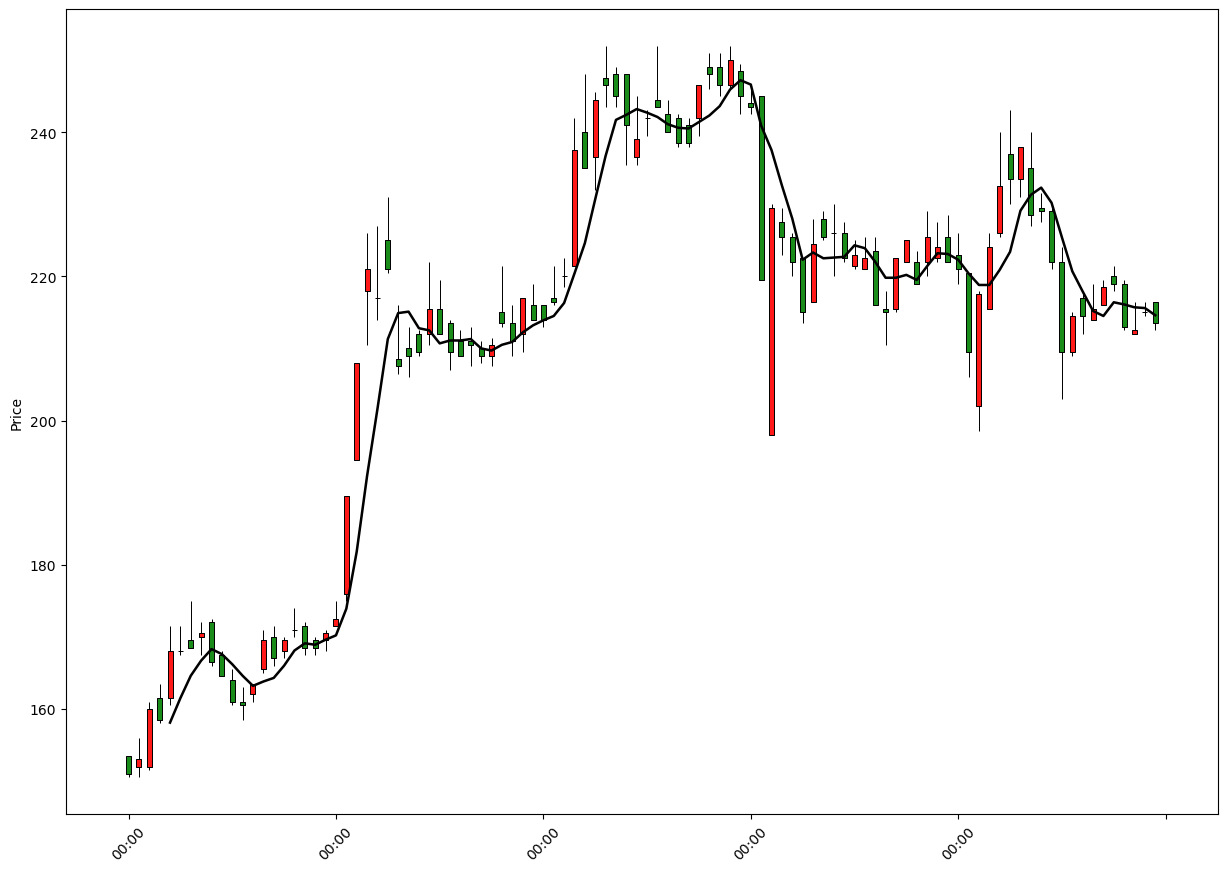

In [56]:
#Part1 介紹的自製移動平均線
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks/stocks_6452.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[:100]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [line for line in stocks['Close']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

addplots = [
            mpf.make_addplot(making_averages(5), color = 'black'),
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

In [58]:
import os
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime
from talib import abstract

dir = os.getcwd()+"\stocks"
files = os.listdir(dir)

for file in files:
    cost = 0
    #收入
    income = 0
    
    stocks = pd.read_csv(dir+"\\"+file)
    stocks_close = [float(line) for line in stocks['Close']]
    stocks_high = [float(line) for line in stocks['High']]
    stocks_low = [float(line) for line in stocks['Low']]
    stocks_open = [float(line) for line in stocks['Open']]
    stocks.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    MAvalue = abstract.SMA(stocks, 7)
    detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
    temp_detail = []
    unit = 1
    stock = 0
    gain = 0
    buy=0
    count=0
   
    for i in range(8, len(MAvalue)):
        
        if buy==0:
                 
            if(MAvalue[i-1] > MAvalue[i]):
                count= count+1 
                
            if((count>=20) and (MAvalue[i] <= ((stocks_open[i] + stocks_close[i])/2))):
                buy_m=stocks_close[i]
                stock += unit
                count = 0
                gain -= round(unit * stocks_close[i] * 1000 * 1.001425)
                temp_detail.append(i)
                temp_detail.append('+' + str(unit))
                temp_detail.append(stocks_close[i])
                temp_detail.append(round(stocks_close[i] * 1.001425, 1))
                temp_detail.append('-' + str(round(unit * stocks_close[i] * 1000 * 1.001425)))
                temp_detail.append(gain)
                detail.append(temp_detail)
                temp_detail = []
                buy=1
                
        if buy==1:
            
            if(MAvalue[i-1] < MAvalue[i]):
                count-=1
            if((count<=(-20)) and (MAvalue[i] >= ((stocks_open[i] + stocks_close[i])/2)) and (stocks_close[i]>buy_m)):
                gain += round(stock * stocks_close[i] * 1000 * 0.995575)
                count = 0
                temp_detail.append(i)
                temp_detail.append('-' + str(stock))
                temp_detail.append(stocks_close[i])
                temp_detail.append(round(stocks_close[i] * 0.995575))
                temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
                temp_detail.append(gain)
                detail.append(temp_detail)
                buy = 0
                stock = 0
                temp_detail = []
        
    if(stock==1):
        gain += round(stock * stocks_close[i] * 1000 * 0.995575)
        temp_detail.append(i)
        temp_detail.append('-' + str(stock))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 0.995575))
        temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        buy = 0
        stock = 0
        temp_detail = []
        
    for i in range(1, len(detail)):
        #支出總和
        if(float(detail[i][4]) < 0):
            cost += abs(int(detail[i][4]))
        #收入總和
        elif(float(detail[i][4]) > 0):
            income += int(detail[i][4])
    detail = pd.DataFrame(detail)

    print(detail)
    
    #總資訊
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    if(cost!=0):
        print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")
    else:
        print("投資報酬率：0%")
    print('\n')


     0         1      2      3       4       5
0   日期  買/賣(+/-)     價格  價格(稅)    實際花費    目前獲利
1   85        +1  42.25   42.3  -42310  -42310
2  119        -1  46.15     46  +45946    3636
3  151        +1  37.95     38  -38004  -34368
4  195        -1  40.75     41  +40570    6202
5  260        +1     43   43.1  -43061  -36859
6  346        -1   43.3     43  +43108    6249
7  392        +1     44   44.1  -44063  -37814
8  475        -1  43.05     43  +42860    5046
支出： 167438 元
收入： 172484 元
淨收益： 5046 元
投資報酬率： 3.01 %


     0         1      2      3       4       5
0   日期  買/賣(+/-)     價格  價格(稅)    實際花費    目前獲利
1   67        +1   24.1   24.1  -24134  -24134
2  475        -1  21.85     22  +21753   -2381
支出： 24134 元
收入： 21753 元
淨收益： -2381 元
投資報酬率： -9.87 %


     0         1      2      3        4        5
0   日期  買/賣(+/-)     價格  價格(稅)     實際花費     目前獲利
1   54        +1    321  321.5  -321457  -321457
2  232        -1  376.5    375  +374834    53377
3  292        +1    274  274.4  -27439